In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [59]:
dataset_shape = df.shape

num_features = len(df.columns) - 2

target_counts = df['target_name'].value_counts()

missing_values_percent = (df.isna().sum().sum() / df.size) * 100

dataset_description = df.describe()

print(f"Размерность всего датасета: {dataset_shape}")
print(f"Количество признаков: {num_features}")
print(f"Количество целевых классов и объектов в каждом из классов:\n{target_counts}")
print(f"Процент объектов с неопределенными признаками: {missing_values_percent:.2f}%")
print("\nИные ключевые характеристики датасета:\n", dataset_description)


Размерность всего датасета: (150, 6)
Количество признаков: 4
Количество целевых классов и объектов в каждом из классов:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
Процент объектов с неопределенными признаками: 0.00%

Иные ключевые характеристики датасета:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000

In [60]:
selected_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

filtered_df = df[selected_features + ['target', 'target_name']].dropna()

filtered_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


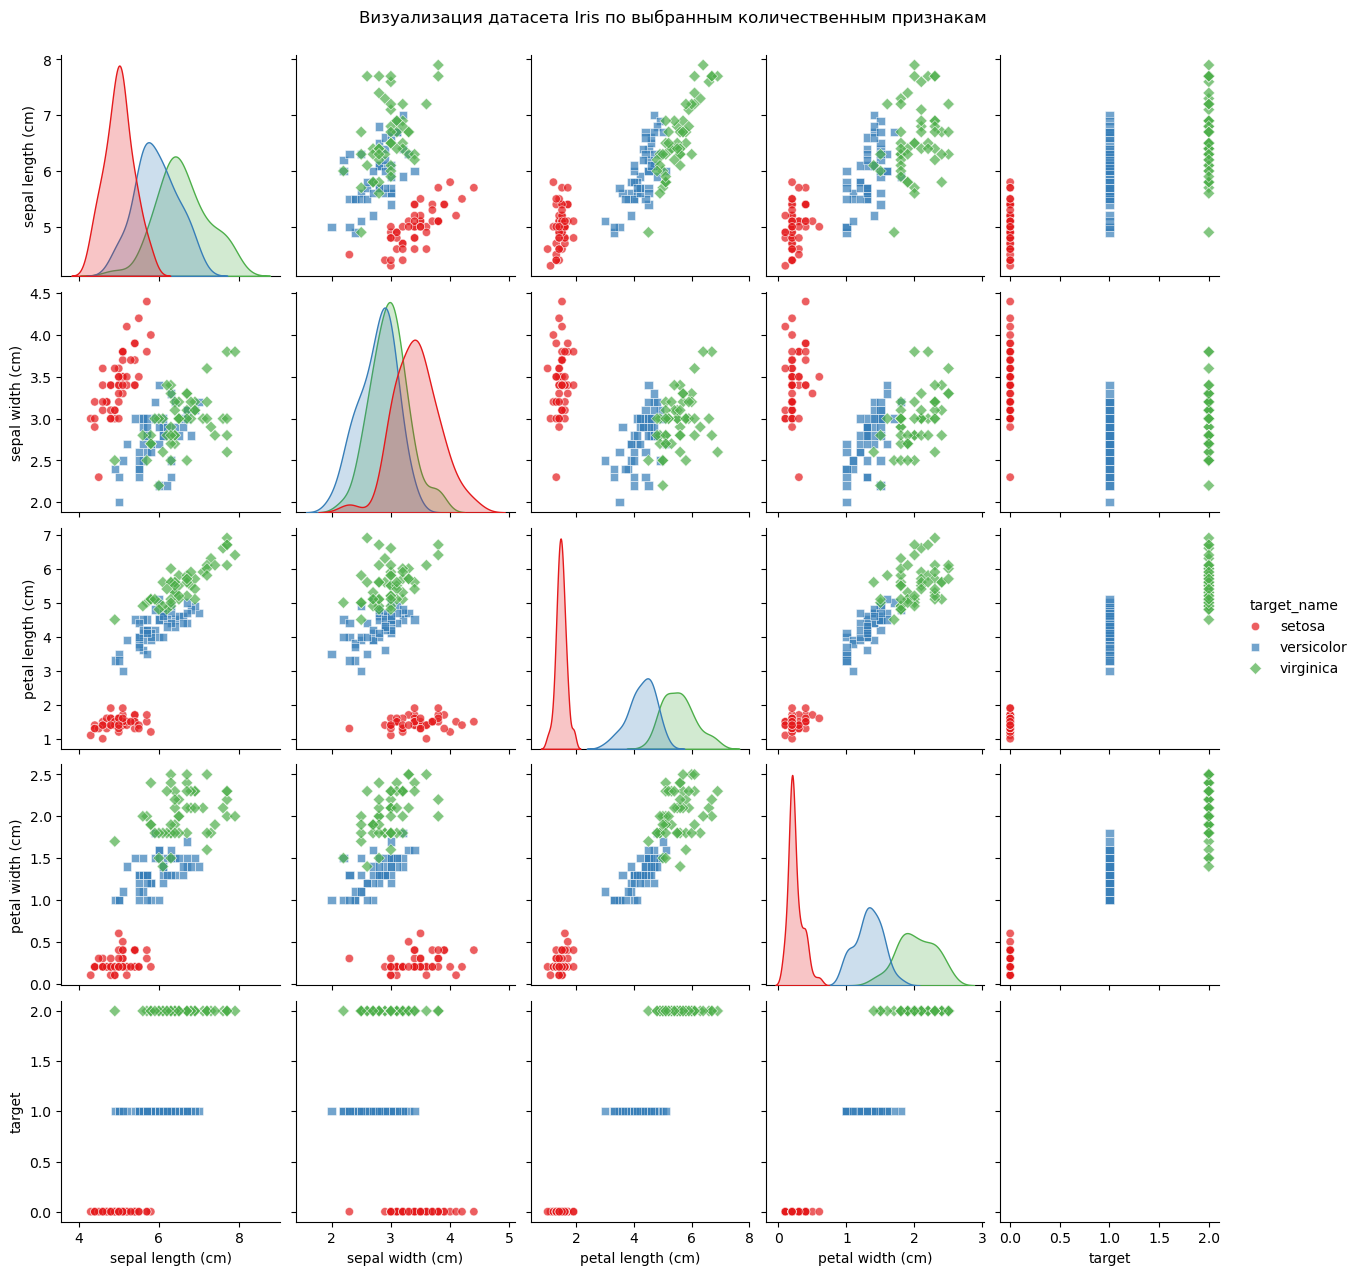

In [61]:
sns.pairplot(filtered_df, hue='target_name', markers=['o', 's', 'D'], palette='Set1',
             plot_kws={'alpha': 0.7}, diag_kind='kde')

plt.suptitle('Визуализация датасета Iris по выбранным количественным признакам', y=1.02)
plt.show()


In [65]:
correlation_matrix_full = df.drop(columns=['target', 'target_name']).corr(method='pearson')

print("Корреляционная матрица для всех объектов датасета:")
display(correlation_matrix_full)


Корреляционная матрица для всех объектов датасета:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [66]:
for class_name in df['target_name'].unique():
    class_df = df[df['target_name'] == class_name]
    # Удаляем нечисловые столбцы 'target' и 'target_name'
    correlation_matrix_class = class_df.drop(columns=['target', 'target_name']).corr(method='pearson')
    
    print(f"\nКорреляционная матрица для класса '{class_name}':")
    display(correlation_matrix_class)



Корреляционная матрица для класса 'setosa':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000



Корреляционная матрица для класса 'versicolor':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000



Корреляционная матрица для класса 'virginica':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


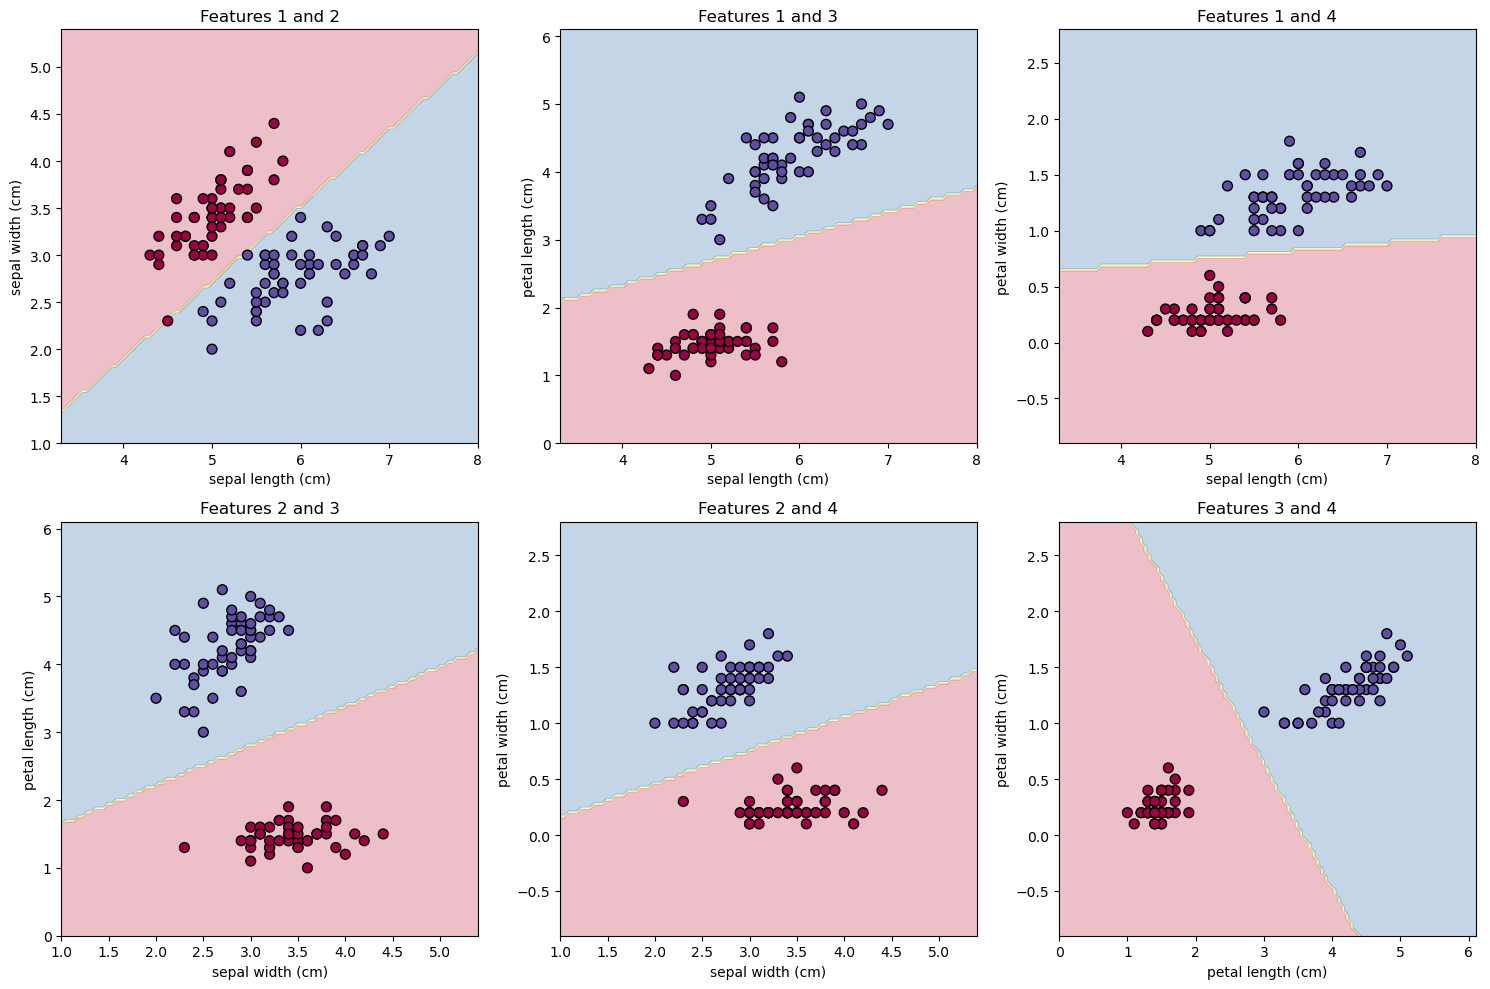

In [67]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data.target
df = df[(df['species'] == 0) | (df['species'] == 1)] 

lda = LinearDiscriminantAnalysis()

X = df.drop(columns=['species']).to_numpy()
y = df['species'].to_numpy()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  
cnt = 0
for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1]):
        X_selected = X[:, [i, j]]

        lda.fit(X_selected, y)

        x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
        y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axs[cnt // 3, cnt % 3].contourf(xx, yy, Z, alpha=0.3, cmap='Spectral')  
        scatter = axs[cnt // 3, cnt % 3].scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap='Spectral', edgecolors='k', s=50)
        
        axs[cnt // 3, cnt % 3].set_title(f"Features {i + 1} and {j + 1}")
        axs[cnt // 3, cnt % 3].set_xlabel(df.columns[i])
        axs[cnt // 3, cnt % 3].set_ylabel(df.columns[j])

        cnt += 1

plt.tight_layout()
plt.show()


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


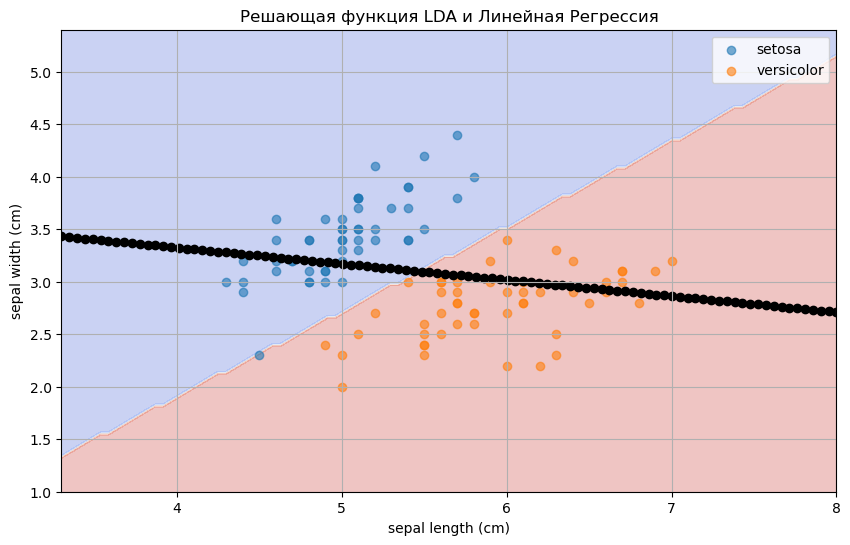

In [71]:
from sklearn.linear_model import LinearRegression

feature_x = selected_features[0]  
feature_y = selected_features[1]  

X_pair = filtered_lda_df[[feature_x, feature_y]]
y_pair = filtered_lda_df['target']

lda = LDA()
lda.fit(X_pair, y_pair)

lin_reg = LinearRegression()
lin_reg.fit(X_pair[[feature_x]], X_pair[feature_y])

plt.figure(figsize=(10, 6))

x_min, x_max = X_pair[feature_x].min() - 1, X_pair[feature_x].max() + 1
y_min, y_max = X_pair[feature_y].min() - 1, X_pair[feature_y].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

for class_value, class_label in zip([0, 1], selected_classes):
    class_data = filtered_lda_df[filtered_lda_df['target'] == class_value]
    plt.scatter(class_data[feature_x], class_data[feature_y], label=class_label, alpha=0.6)

model = LinearRegression()

plt.scatter(xx_new, yy_new, color='black')

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Решающая функция LDA и Линейная Регрессия')
plt.legend()
plt.grid(True)
plt.show()


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


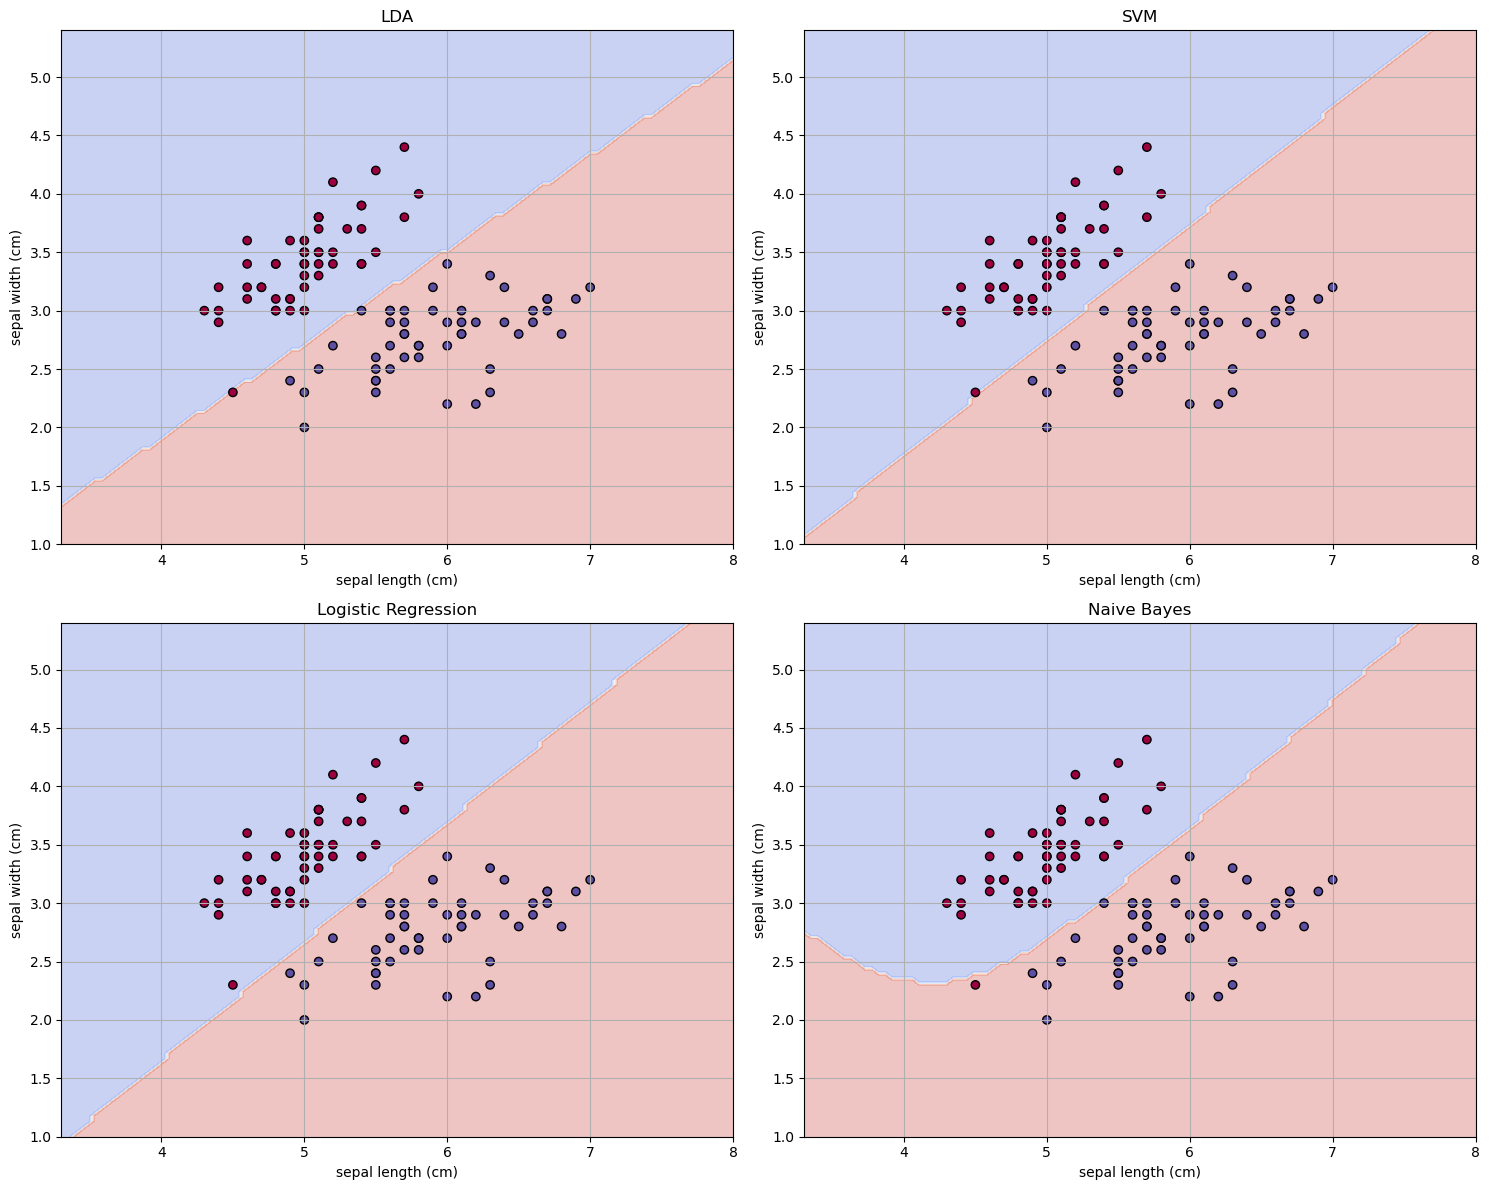

In [69]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

X_pair = filtered_lda_df[[feature_x, feature_y]]
y_pair = filtered_lda_df['target']

classifiers = {
    "LDA": LDA(),
    "SVM": SVC(kernel='linear', probability=True),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.ravel()

for idx, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_pair, y_pair)

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    axs[idx].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    axs[idx].scatter(X_pair[feature_x], X_pair[feature_y], c=y_pair, cmap='Spectral', edgecolors='k')
    
    axs[idx].set_title(name)
    axs[idx].set_xlabel(feature_x)
    axs[idx].set_ylabel(feature_y)
    axs[idx].grid(True)

plt.tight_layout()
plt.show()



Linear Discriminant Analysis
                      0
TP           100.000000
TN            49.000000
FP             1.000000
FN             0.000000
Precision      0.990099
Recall         1.000000
Sensitivity    1.000000
Specificity    0.980000

SVC
                      0
TP           100.000000
TN            49.000000
FP             1.000000
FN             0.000000
Precision      0.990099
Recall         1.000000
Sensitivity    1.000000
Specificity    0.980000

Logistic Regression
                 0
TP           100.0
TN            50.0
FP             0.0
FN             0.0
Precision      1.0
Recall         1.0
Sensitivity    1.0
Specificity    1.0

Naive Bayes Classifier
                      0
TP           100.000000
TN            49.000000
FP             1.000000
FN             0.000000
Precision      0.990099
Recall         1.000000
Sensitivity    1.000000
Specificity    0.980000


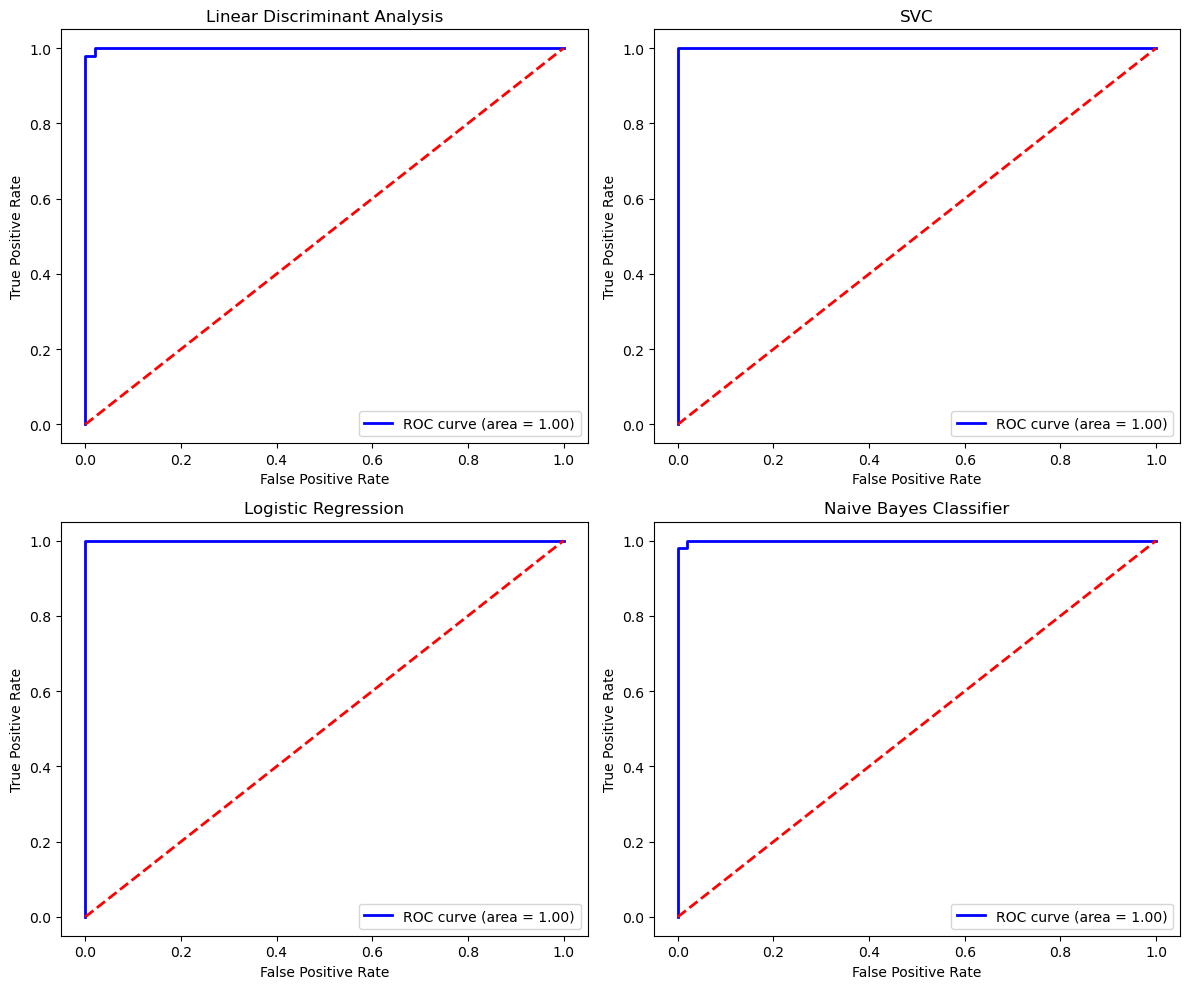

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics = {
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'Recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'Sensitivity': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'Specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
    }
    return metrics

def plot_roc_curve(y_true, y_scores, ax, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    ax.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data.target

df.loc[df['species'] == 2, 'species'] = 1

X = df.drop(columns=['species']).to_numpy()
y = df['species'].to_numpy()

X_selected = X[:, :2]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'SVC': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes Classifier': GaussianNB()
}

for ax, (name, model) in zip(axs.flatten(), models.items()):
    model.fit(X_selected, y)
    y_pred = model.predict(X_selected)
    y_scores = model.predict_proba(X_selected)[:, 1]

    metrics = compute_metrics(y, y_pred)

    print(f'\n{name}')
    print(pd.DataFrame(metrics, index=[0]).T)

    plot_roc_curve(y, y_scores, ax, name)

plt.tight_layout()
plt.show()
